In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

In [2]:
#read_csv into file
full_features = pd.read_csv('full_features.csv')

full_features

,year_planted_grafted,age,yield_class,Daily_High,Daily _Low,Precipitation,year,month,day,color_BLACK,...,ranch_29,ranch_30,ranch_31,ranch_32,ranch_33,ranch_34,ranch_35,ranch_36,ranch_37,ranch_50
0,2009,6.0,high,94,68,0.0,2015,7,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,9.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,4.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
3,2011,4.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
4,2012,3.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2010,8.0,high,74,39,0.0,2018,11,12,0,...,0,0,0,1,0,0,0,0,0,0
3362,2012,6.0,low,74,39,0.0,2018,11,12,0,...,0,0,0,1,0,0,0,0,0,0
3363,2017,1.0,low,74,39,0.0,2018,11,12,0,...,0,0,0,1,0,0,0,0,0,0
3364,2009,10.0,high,93,65,0.0,2019,7,1,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
yield_class = full_features['yield_class']

#drop yield_class from dataset
full_features = full_features.drop(['yield_class'], axis = 1)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=0.1, class_weight='balanced', penalty='l1', dual=False))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(full_features, yield_class, test_size=0.2, random_state=42)

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        high       0.70      0.62      0.66       375
         low       0.59      0.67      0.63       299

    accuracy                           0.64       674
   macro avg       0.64      0.65      0.64       674
weighted avg       0.65      0.64      0.65       674



/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


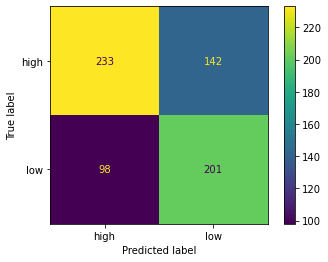

In [4]:
# Plot confusion matrix
plot_confusion_matrix(pipeline, X_test, y_test)
plt.show()

In [5]:
# Evaluate model using 5-fold cross-validation
scores = cross_val_score(pipeline, full_features, yield_class, cv=5)

# Print average performance across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 0.58 (+/- 0.07)


In [6]:
dump(pipeline, 'svm_model.pkl')

['svm_model.pkl']